# Credit Card Fraud Detection

## Import The Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SVMSMOTE
from sklearn.metrics import classification_report, confusion_matrix

## Load The Dataset

In [24]:
# Load the dataset
creditcard_df  = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/CodSoft/Task-05/creditcard.csv')

# View the first 5 data 
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## DATA PREPROCESSING

In [25]:
# check for missing values
creditcard_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# Check unique values in the 'Class' column
unique_values = creditcard_df['Class'].unique()
print(unique_values)

[0 1]


In [26]:
# Normalize the numerical features
scaler = StandardScaler()
creditcard_df.iloc[:, 1:-1] = scaler.fit_transform(creditcard_df.iloc[:, 1:-1])

## Handling Imbalance using SVMSMOTE

In [27]:
# Handling class imbalance
X = creditcard_df.iloc[:, :-1]
y = creditcard_df['Class']
svmsmote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svmsmote.fit_resample(X, y)

## Data Visualization

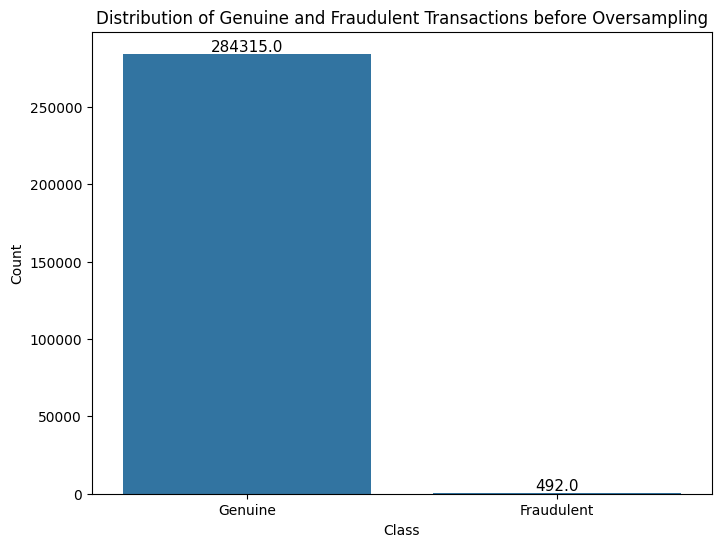

In [28]:
# Plot the distribution of genuine and fraudulent transactions before oversampling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=creditcard_df)
plt.title('Distribution of Genuine and Fraudulent Transactions before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

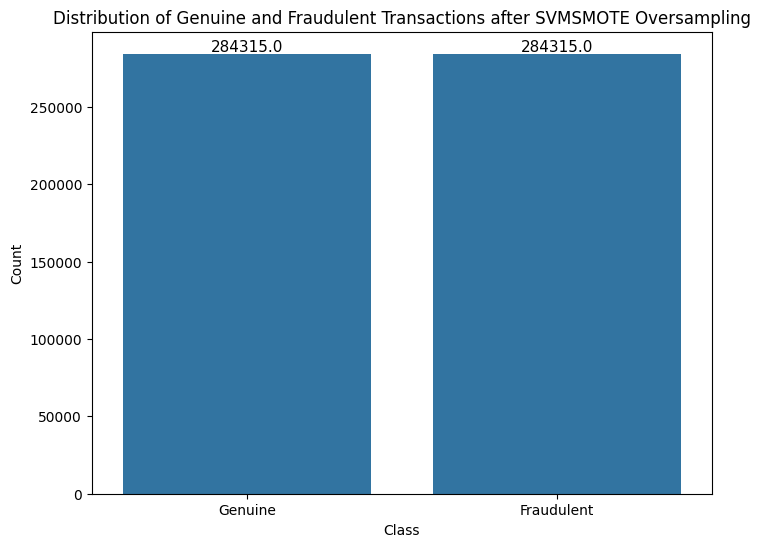

In [29]:
# Plot the distribution of genuine and fraudulent transactions after SVMSMOTE oversampling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_resampled)
plt.title('Distribution of Genuine and Fraudulent Transactions after SVMSMOTE Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fraudulent'])

# Add count numbers on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

## Building the Model


In [30]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Training a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     56750
           1       0.99      0.99      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



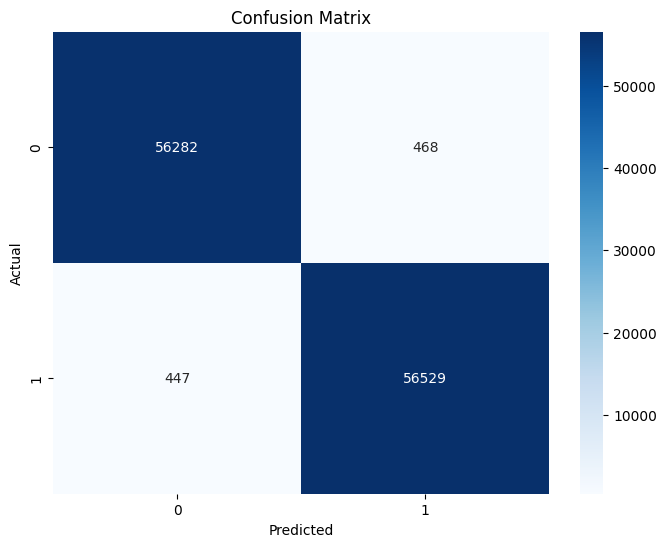

In [33]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()